In [1]:
import pandas as pd


In [2]:
with open("HisFeedBack/Positive.txt",'r',encoding = 'utf8') as f:
    num_pos = len(f.readlines())
with open("HisFeedBack/Negative.txt",'r',encoding = 'utf8') as f:
    num_neg = len(f.readlines())
# Sample data
data = {
    'Category': ['Positive', 'Negative'],
    'Values': [num_pos, num_neg]
}

df = pd.DataFrame(data)

In [3]:
data

{'Category': ['Positive', 'Negative'], 'Values': [28, 13]}

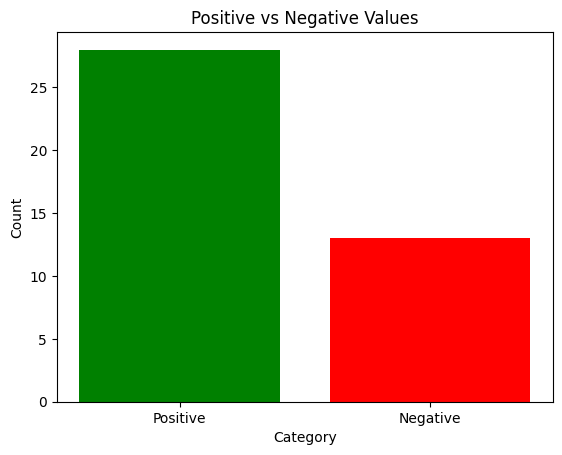

In [4]:
import matplotlib.pyplot as plt


categories = data['Category']
values = data['Values']

plt.bar(categories, values, color=['green', 'red'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Positive vs Negative Values')
plt.show()


In [6]:
import requests
from bs4 import BeautifulSoup

url = "http://192.168.1.8:8000/sentiment/chatbot/"

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

response_element = soup.find('p', class_='response')
if response_element:
    chatbot_response = response_element.text.replace("Response:", "").strip()
    print("Chatbot Response:", chatbot_response)
else:
    print("Response element not found on the page.")


Chatbot Response: 


In [10]:
import json
import requests
import certifi

BASE_URL = "https://api.bard.ai/v1"

def get_bard_api():
  """Gets the Bard API key."""
  requests.certifi = certifi.where()
  response = requests.get(BASE_URL + "/auth/api-key")
  if response.status_code == 200:
    return json.loads(response.content)["key"]
  else:
    raise Exception("Could not get Bard API key.")

if __name__ == "__main__":
  api_key = get_bard_api()
  print(api_key)

SSLError: HTTPSConnectionPool(host='api.bard.ai', port=443): Max retries exceeded with url: /v1/auth/api-key (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate (_ssl.c:997)')))